# import Libraries

# Objective of the project

1.This project is aimed at building a classification model that will predict which posts are likely to go viral or generate the most engagement.

2.Identify users with high engagement and influence in specific topics or communities.

3.Recommend personalized content to users based on their interests, past behavior, and social network connections

So, in this project, i will be using the Decision Tree, Gradient boosting Models respectively for the prediction.  
K-Nearest Neighbors (KNN) model for the recommendation.
Finally, to identify an influencers, thresholds will be set for engagement rate and number of followers, then the data will be sorted by topics, and the top influencer for each topic will be selected based on the users that meet the set thresholds.

# project summary

In this project, I imported libraries, loaded CSV files, merged datasets, and performed data preprocessing and exploratory data analysis (EDA).

For the first task, I calculated the engagement rate and set a threshold to classify the 'post_virality' column. I conducted correlation analysis, checked for skewness, and split the dataset. I trained Decision Tree and Gradient Boosting models, evaluated their performance, and saved them for future predictions.

For the second task, influencers were identified by filtering the dataset based on thresholds for engagement rate and number of followers. The filtered data was sorted by topics, and the top influencer for each topic was selected based on their highest engagement rate and number of followers.

For the third task, a user-item matrix was created based on the strengths of interactions and social connections between users and interests. Recommendations were generated using the K-Nearest Neighbors algorithm, providing the recommended interests along with their associated interaction and social connection strengths for each user. the model was saved for future purpose.

In [1]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union
import warnings

# Standard imports
import numpy as np
import pandas as pd
import random

warnings.filterwarnings("ignore")


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 2_000

# Black code formatter (Optional)
#%load_ext nb_black

# Load the Dataset

In [2]:
# Load the datasets

#  get the user data
data_1= pd.read_csv("user1_data.csv")

#get the post_data
data_2 = pd.read_csv("post1_data.csv")

In [3]:
data_1

,user_id,email,phone_number,password,first_name,last_name,gender,date_of_birth,username,country,occupation,number_followers,number_following,interest
0,0,dennisball@gmail.com,554-403-1792,cY*2J3McTH,Kerri,Hensley,Male,1985-01-09,ablack,Gambia,Diagnostic radiographer,83,0,photography
1,1,kimberlycook@yahoo.com,403-440-6899,j#2TCtmTQm,Thomas,Jones,Male,2005-04-05,brandon56,Monaco,Homeopath,162,139,"business, banking, zoology"
2,2,brandyschroeder@gmail.com,567-209-9025,*2gIOVu0!6,Robin,Wyatt,Male,1982-12-19,gbest,Congo,Dietitian,162,17,political
3,3,corygonzalez@gmail.com,324-892-5298,R(w8kXSq+N,Kristen,Frazier,Others,1998-07-18,ibaker,Russian Federation,Site engineer,112,29,Fashion Design
4,4,henry24@yahoo.com,944-169-6500,aYy^V6mQ1(,James,Green,Male,1964-07-06,meganfarmer,Angola,Agricultural consultant,75,4,"Relationships, Tech news"
5,5,greynolds@yahoo.com,754-577-5577,%08H8Xqk*7,Christine,Williams,Male,1963-04-10,wlindsey,Maldives,"Production assistant, radio",133,195,"dance, Relocation"
6,6,aaron10@gmail.com,774-344-6098,*1Ok5hGcS1,Travis,Calhoun,Female,2003-06-18,carterkevin,Mozambique,Insurance risk surveyor,93,97,"Big brother naija, Music"
7,7,christopherdeleon@yahoo.com,299-308-6090,1_b8gZb3Il,Harry,Morse,Male,1997-10-23,melissa42,Slovakia (Slovak Republic),Water quality scientist,65,30,"graphic, ux design, business"
8,8,qconley@gmail.com,798-726-8340,EdnBSUjy_3,Mary,Schwartz,Others,1985-05-18,adamthompson,British Indian Ocean Territory (Chagos Archipelago),"Administrator, arts",119,165,painting
9,9,kimberlythomas@yahoo.com,957-798-9828,&3WGMVUz@8,Mary,Barker,Others,1992-11-22,kristen30,Guadeloupe,Commercial art gallery manager,112,126,"Tech news, dance"


In [4]:
data_2

,post_id,user_id,topics,post_content,number_of_likes,number_of_retweets,number_of_views,shared_with_other_social_media,privacy_setting
0,0,120,graphic,find a quick way to graphic,67,12,157,Instagram,Public
1,1,25,Craft,how to sell craft,66,41,153,Snapchat,Private
2,2,151,politics,politics an incredibly easy method that works for all,19,26,157,Instagram,Public
3,3,85,political,5 brilliant ways to use political,16,3,164,Instagram,Public
4,4,85,Mathematics,how to make your mathematics look amazing in 5 days,36,27,161,Instagram,Private
...,...,...,...,...,...,...,...,...,...
5995,5995,101,programming,who else wants to be successful with programming,13,28,161,Not Shared,Private
5996,5996,149,science,avoid the top 10 science mistakes,60,16,151,Facebook,Public
5997,5997,152,drawing,7 and a half very simple things you can do to save drawing,59,13,163,Instagram,Public
5998,5998,21,zoology,why everything you know about zoology is a lie,57,34,161,WeChat,Private


# Data Wrangling

In [5]:
# checking data types
data_1.shape, data_2.shape

((200, 14), (6000, 9))

In [6]:
# checking columns 
data_1.columns, data_2.columns

(Index(['user_id', 'email', 'phone_number', 'password', 'first_name',
        'last_name', 'gender', 'date_of_birth', 'username', 'country',
        'occupation', 'number_followers', 'number_following', 'interest'],
       dtype='object'),
 Index(['post_id', 'user_id', 'topics', 'post_content', 'number_of_likes',
        'number_of_retweets', 'number_of_views',
        'shared_with_other_social_media', 'privacy_setting'],
       dtype='object'))

In [7]:
#checking datatypes
data_1.dtypes, data_2.dtypes

(user_id              int64
 email               object
 phone_number        object
 password            object
 first_name          object
 last_name           object
 gender              object
 date_of_birth       object
 username            object
 country             object
 occupation          object
 number_followers     int64
 number_following     int64
 interest            object
 dtype: object,
 post_id                            int64
 user_id                            int64
 topics                            object
 post_content                      object
 number_of_likes                    int64
 number_of_retweets                 int64
 number_of_views                    int64
 shared_with_other_social_media    object
 privacy_setting                   object
 dtype: object)

# combining two Datasets to form a single Dataset

In [8]:
#  performing a left merge operation between two datasets (data_1 and data_2) on the common column "user_id"
df= data_1.merge(data_2, on="user_id", how="left")
df

,user_id,email,phone_number,password,first_name,last_name,gender,date_of_birth,username,country,occupation,number_followers,number_following,interest,post_id,topics,post_content,number_of_likes,number_of_retweets,number_of_views,shared_with_other_social_media,privacy_setting
0,0,dennisball@gmail.com,554-403-1792,cY*2J3McTH,Kerri,Hensley,Male,1985-01-09,ablack,Gambia,Diagnostic radiographer,83,0,photography,61,painting,painting works only under these conditions,19,2,159,WhatsApp,Public
1,0,dennisball@gmail.com,554-403-1792,cY*2J3McTH,Kerri,Hensley,Male,1985-01-09,ablack,Gambia,Diagnostic radiographer,83,0,photography,161,HR management,12 questions answered about hr management,37,2,167,Hybrid,Public
2,0,dennisball@gmail.com,554-403-1792,cY*2J3McTH,Kerri,Hensley,Male,1985-01-09,ablack,Gambia,Diagnostic radiographer,83,0,photography,279,banking,where is the best banking?,21,32,166,WhatsApp,Public
3,0,dennisball@gmail.com,554-403-1792,cY*2J3McTH,Kerri,Hensley,Male,1985-01-09,ablack,Gambia,Diagnostic radiographer,83,0,photography,436,Mathematics,10 unforgivable sins of mathematics,73,16,150,Hybrid,Public
4,0,dennisball@gmail.com,554-403-1792,cY*2J3McTH,Kerri,Hensley,Male,1985-01-09,ablack,Gambia,Diagnostic radiographer,83,0,photography,626,political,you can thank us later - 3 reasons to stop thinking about political,71,40,151,Hybrid,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,199,shane14@gmail.com,758-373-2251,+GE7y4Dk+3,Robert,Kelley,Others,1962-05-21,jenniferdudley,Cuba,Retail buyer,150,92,"business, photography",4502,HR management,it's all about (the) hr management,49,32,155,WhatsApp,Public
5996,199,shane14@gmail.com,758-373-2251,+GE7y4Dk+3,Robert,Kelley,Others,1962-05-21,jenniferdudley,Cuba,Retail buyer,150,92,"business, photography",4726,programming,get rid of programming for good,9,6,157,WeChat,Public
5997,199,shane14@gmail.com,758-373-2251,+GE7y4Dk+3,Robert,Kelley,Others,1962-05-21,jenniferdudley,Cuba,Retail buyer,150,92,"business, photography",5242,zoology,the untapped gold mine of zoology that virtually no one knows about,45,49,167,Instagram,Private
5998,199,shane14@gmail.com,758-373-2251,+GE7y4Dk+3,Robert,Kelley,Others,1962-05-21,jenniferdudley,Cuba,Retail buyer,150,92,"business, photography",5680,dance,you will thank us - 10 tips about dance you need to know,0,43,154,Instagram,Private


# validating Data

In [9]:
df.isnull().sum()


user_id                           0
email                             0
phone_number                      0
password                          0
first_name                        0
last_name                         0
gender                            0
date_of_birth                     0
username                          0
country                           0
occupation                        0
number_followers                  0
number_following                  0
interest                          0
post_id                           0
topics                            0
post_content                      0
number_of_likes                   0
number_of_retweets                0
number_of_views                   0
shared_with_other_social_media    0
privacy_setting                   0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   user_id                         6000 non-null   int64 
 1   email                           6000 non-null   object
 2   phone_number                    6000 non-null   object
 3   password                        6000 non-null   object
 4   first_name                      6000 non-null   object
 5   last_name                       6000 non-null   object
 6   gender                          6000 non-null   object
 7   date_of_birth                   6000 non-null   object
 8   username                        6000 non-null   object
 9   country                         6000 non-null   object
 10  occupation                      6000 non-null   object
 11  number_followers                6000 non-null   int64 
 12  number_following                6000 non-null   

In [11]:
df.shape

(6000, 22)

In [12]:
df.columns

Index(['user_id', 'email', 'phone_number', 'password', 'first_name',
       'last_name', 'gender', 'date_of_birth', 'username', 'country',
       'occupation', 'number_followers', 'number_following', 'interest',
       'post_id', 'topics', 'post_content', 'number_of_likes',
       'number_of_retweets', 'number_of_views',
       'shared_with_other_social_media', 'privacy_setting'],
      dtype='object')

In [13]:
df.dtypes

user_id                            int64
email                             object
phone_number                      object
password                          object
first_name                        object
last_name                         object
gender                            object
date_of_birth                     object
username                          object
country                           object
occupation                        object
number_followers                   int64
number_following                   int64
interest                          object
post_id                            int64
topics                            object
post_content                      object
number_of_likes                    int64
number_of_retweets                 int64
number_of_views                    int64
shared_with_other_social_media    object
privacy_setting                   object
dtype: object

In [14]:
df = df.drop('password', axis=1)


In [15]:
df['post_content'].value_counts()

 the secret of business                                 2
 the secret of science                                  2
 the secret of politics                                 2
 the secret of dance                                    2
 the secret of mathematics                              2
                                                       ..
 how to turn politics into success                      1
 how to become better with drawing in 10 minutes        1
 here is a quick cure for graphic                       1
the ultimate guide to hr management                     1
business is bound to make an impact in your business    1
Name: post_content, Length: 5980, dtype: int64

In [16]:
# checking duplicated data
df.duplicated().sum()

0

In [17]:
duplicate_rows = df[df.duplicated()]
if duplicate_rows.empty:
    print("No duplicate records")
else:
    print("Duplicate records:")
    print(duplicate_rows)


No duplicate records


In [18]:
# Check for age values outside the allowable range
current_year = 2023
min_age = 18  # Minimum allowable age
max_age = 65  # Maximum allowable age
invalid_age = df[(df['date_of_birth'].apply(lambda x: current_year - int(x[:4]))) < min_age]
(df['date_of_birth'].apply(lambda x: current_year - int(x[:4]))) > max_age
if invalid_age.empty:
    print("No invalid age values")
else:
    print("Invalid age values:")
    print(invalid_age)

# Check for number_of_likes exceeding reasonable limits
max_likes = 80 # Maximum reasonable number of likes
invalid_likes = df[df['number_of_likes'] > max_likes]
if invalid_likes.empty:
    print("No invalid number_of_likes")
else:
    print("Invalid number_of_likes values:")
    print(invalid_likes)

# Check for number_of_retweets exceeding reasonable limits
max_retweets = 50  # Maximum reasonable number of retweets
invalid_retweets = df[df['number_of_retweets'] > max_retweets]
if invalid_retweets.empty:
    print("No invalid number_of_retweets")
else:
    print("Invalid number_of_retweets values:")
    print(invalid_retweets)

# Check for number_of_views exceeding reasonable limits
max_views = 170  # Maximum reasonable number of views
invalid_views = df[df['number_of_views'] > max_views]
if invalid_views.empty:
    print("No invalid number_of_views")
else:
    print("Invalid number_of_views values:")
    print(invalid_views)

# Check for number_followers exceeding reasonable limits
max_followers = 1000  # Maximum reasonable number of followers
invalid_followers = df[df['number_followers'] > max_followers]
if invalid_followers.empty:
    print("No invalid number_followers")
else:
    print("Invalid number_followers values:")
    print(invalid_followers)

# Check for number_following exceeding reasonable limits
max_following = 1000  # Maximum reasonable number of following
invalid_following = df[df['number_following'] > max_following]
if invalid_following.empty:
    print("No invalid number_following")
else:
    print("Invalid number_following values:")
    print(invalid_following)


No invalid age values
No invalid number_of_likes
No invalid number_of_retweets
No invalid number_of_views
No invalid number_followers
No invalid number_following


In [19]:
# Select the numerical columns where you want to handle outliers
numerical_columns = ['number_of_likes', 'number_of_retweets', 'number_of_views', 'number_following', 
                     'number_followers']

# Loop over the numerical columns
for column_name in numerical_columns:
    # Compute the z-scores for the column
    z_scores = (df[column_name] - df[column_name].mean()) / df[column_name].std()

    # Set a threshold for identifying outliers
    threshold = 3

    # Find the indices of outliers
    outlier_indices = np.where(np.abs(z_scores) > threshold)[0]

    # Print the outlier indices for each column
    if len(outlier_indices) == 0:
        print("No outliers detected in column:", column_name)
    else:
        print("Outlier indices for column", column_name + ":")
        print(outlier_indices)

    # Handle outliers (e.g., replace with a predefined value or remove)
    # Replace outliers with a predefined value (e.g., mean)
    df.loc[outlier_indices, column_name] = df[column_name].mean()

    # Remove outliers from the DataFrame
    df = df.drop(outlier_indices)


No outliers detected in column: number_of_likes
No outliers detected in column: number_of_retweets
No outliers detected in column: number_of_views
No outliers detected in column: number_following
No outliers detected in column: number_followers


In [20]:
# Analyze categorical variables and display unique values
categorical_columns = ['gender', 'country', 'occupation', 'interest']

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print()

Unique values in gender:
['Male' 'Others' 'Female']

Unique values in country:
['Gambia' 'Monaco' 'Congo' 'Russian Federation' 'Angola' 'Maldives'
 'Mozambique' 'Slovakia (Slovak Republic)'
 'British Indian Ocean Territory (Chagos Archipelago)' 'Guadeloupe'
 'Bolivia' 'Cyprus' 'Mexico' 'San Marino' 'Rwanda' 'Hungary' 'Poland'
 'British Virgin Islands' 'Australia' 'Timor-Leste' 'El Salvador'
 'Saudi Arabia' 'Palau' 'Afghanistan' 'Tunisia' 'Botswana' 'Jersey'
 'Nicaragua' 'New Caledonia' 'Romania' 'Venezuela' 'Dominica' 'Korea'
 'Pakistan' 'Kuwait' 'Central African Republic'
 'United States Minor Outlying Islands' 'Germany' 'Lebanon'
 'Trinidad and Tobago' 'Luxembourg' 'Jamaica' 'Macao' 'Zambia' 'Aruba'
 'Nigeria' 'Italy' 'Guinea' 'Faroe Islands' 'Belarus' 'Guinea-Bissau'
 'Dominican Republic' 'Seychelles' 'Libyan Arab Jamahiriya' 'Mali'
 'Saint Vincent and the Grenadines' 'Azerbaijan' 'Israel' 'Canada'
 'Uzbekistan' 'Saint Barthelemy' 'Chile' 'Bulgaria'
 'Sao Tome and Principe' 'New Zea

# preprocessing the post_content column

In [21]:
df['post_content']

0                                 painting works only under these conditions
1                                  12 questions answered about hr management
2                                                 where is the best banking?
3                                        10 unforgivable sins of mathematics
4        you can thank us later - 3 reasons to stop thinking about political
                                        ...                                 
5995                                      it's all about (the) hr management
5996                                         get rid of programming for good
5997     the untapped gold mine of zoology that virtually no one knows about
5998                you will thank us - 10 tips about dance you need to know
5999                    business is bound to make an impact in your business
Name: post_content, Length: 6000, dtype: object

In [22]:
import re
import string


In [23]:
def clean_post_content(text):
    # Remove unwanted characters and symbols
    text = re.sub(r"[^a-zA-Z\s" + string.printable + "]", " ", text)
    # Remove consecutive dots (...)
    text = re.sub(r"\.{2,}", " ", text)
    # Remove parentheses and their contents
    text = re.sub(r"\([^)]*\)", " ", text)
    # Remove exclamation marks
    text = text.replace("!", " ")
    # Remove numbers
    text = re.sub(r"\b\d+\b", " ", text)
    # Remove extra spaces
    text = re.sub(r"\s+", " ", text)
    return text.strip()

# Clean the post_content column
df['post_content'] = df['post_content'].apply(clean_post_content)

# Print the cleaned text for the first few rows
print(df['post_content'])


0                                painting works only under these conditions
1                                    questions answered about hr management
2                                                where is the best banking?
3                                          unforgivable sins of mathematics
4         you can thank us later - reasons to stop thinking about political
                                       ...                                 
5995                                           it's all about hr management
5996                                        get rid of programming for good
5997    the untapped gold mine of zoology that virtually no one knows about
5998                  you will thank us - tips about dance you need to know
5999                   business is bound to make an impact in your business
Name: post_content, Length: 6000, dtype: object


In [24]:
# Convert the topics columns to lowercase
df["topics"] = df["topics"].str.lower()
df["topics"] = df["topics"].str.strip()
df.head(2)

,user_id,email,phone_number,first_name,last_name,gender,date_of_birth,username,country,occupation,number_followers,number_following,interest,post_id,topics,post_content,number_of_likes,number_of_retweets,number_of_views,shared_with_other_social_media,privacy_setting
0,0,dennisball@gmail.com,554-403-1792,Kerri,Hensley,Male,1985-01-09,ablack,Gambia,Diagnostic radiographer,83.0,0.0,photography,61,painting,painting works only under these conditions,19.0,2.0,159.0,WhatsApp,Public
1,0,dennisball@gmail.com,554-403-1792,Kerri,Hensley,Male,1985-01-09,ablack,Gambia,Diagnostic radiographer,83.0,0.0,photography,161,hr management,questions answered about hr management,37.0,2.0,167.0,Hybrid,Public


 # Data Exploration

In [25]:
df.describe()

,user_id,number_followers,number_following,post_id,number_of_likes,number_of_retweets,number_of_views
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,98.843333,94.530000,105.064667,2999.500000,39.937500,24.792333,160.043333
std,57.658632,52.185014,56.974785,1732.195139,23.348093,14.655386,6.098687
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000
25%,49.000000,48.000000,58.000000,1499.750000,19.000000,12.000000,155.000000
50%,98.000000,101.000000,112.000000,2999.500000,40.000000,25.000000,160.000000
75%,149.000000,137.000000,151.000000,4499.250000,60.000000,37.000000,165.000000
max,199.000000,180.000000,199.000000,5999.000000,80.000000,50.000000,170.000000


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

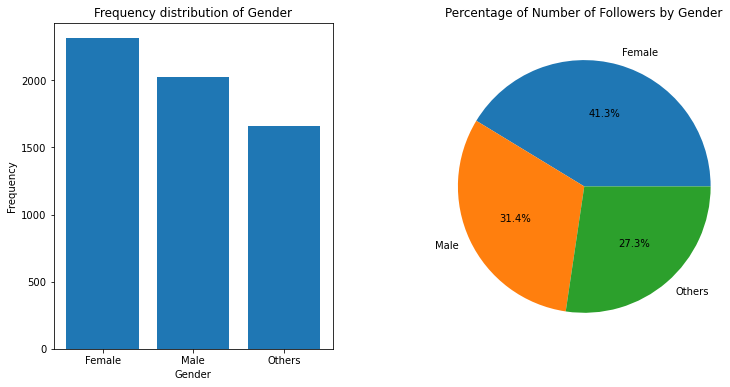

In [66]:
# Plotting the frequency distribution bar plot
gender_distribution = df['gender'].value_counts()

# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the frequency distribution bar plot on ax1
ax1.bar(gender_distribution.index, gender_distribution.values)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Frequency')
ax1.set_title('Frequency distribution of Gender')

# Calculating the number of followers by gender
followers_by_gender = df.groupby('gender')['number_followers'].sum()

# Plotting the pie chart on ax2
ax2.pie(followers_by_gender, labels=followers_by_gender.index, autopct='%1.1f%%')
ax2.set_title('Percentage of Number of Followers by Gender')
ax2.axis('equal')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

# Save the figure
plt.savefig('Gender_Followers_Charts.png')

# Show the plots
plt.show()


In [28]:
average_followers = df.groupby('gender')['number_followers'].mean()
average_followers

gender
Female    101.238980
Male       87.678994
Others     93.546441
Name: number_followers, dtype: float64

According to the analysis, the average number of followers differs based on gender.Females have an average of 101.24 followers, males have an average of 87.68 followers, and individuals with other gender identities have an average of 93.55 followers. This suggests that, on average, females tend to have a slightly higher number of followers compared to males and individuals with other gender identities.

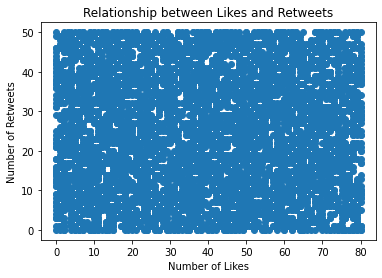

In [29]:
# Scatter plot to visualize the relationship between 'number_of_likes' and 'number_of_retweets'
plt.scatter(df['number_of_likes'], df['number_of_retweets'])
plt.xlabel('Number of Likes')
plt.ylabel('Number of Retweets')
plt.title('Relationship between Likes and Retweets')
plt.show()


 the scatter plot appears with the points very close together or overlapping, it means that there is a high concentration of data points with similar values for number_of_likes and number_of_retweets, which indicate that a large portion of the posts in the dataset have similar levels of likes and retweets.

In [31]:
# Frequency table for categorical variables
categorical_variables = ['topics', 'country']
categorical_frequency = df[categorical_variables].value_counts().reset_index()
categorical_frequency

,topics,country,0
0,mathematics,Cyprus,15
1,fashion design,Uzbekistan,13
2,graphic,Cyprus,12
3,operating system,Pakistan,12
4,business,Nicaragua,11
...,...,...,...
2386,photography,Gambia,1
2387,photography,Germany,1
2388,photography,Ghana,1
2389,fashion design,Indonesia,1


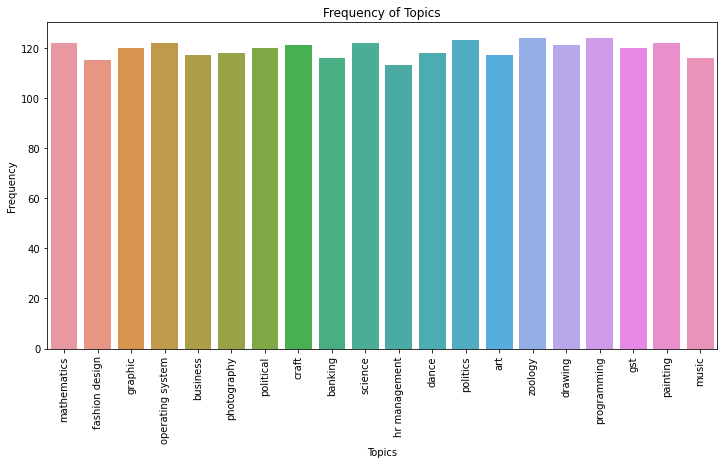

In [32]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot histogram of categorical variable frequencies
sns.countplot(x='topics', data=categorical_frequency)
plt.xlabel('Topics')
plt.ylabel('Frequency')
plt.title('Frequency of Topics')
plt.xticks(rotation=90)

plt.show()


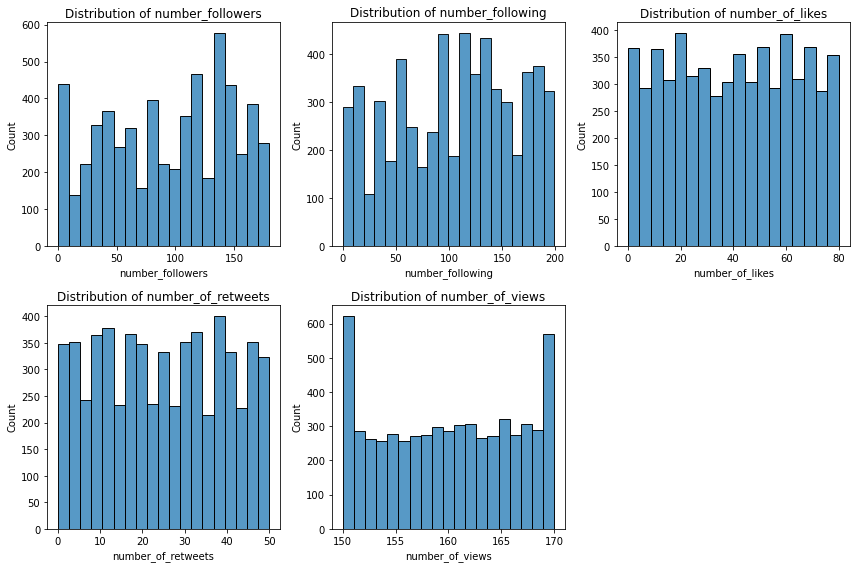

In [34]:
THRESH = 10

columns_to_plot = ['number_followers', 'number_following', 'number_of_likes', 'number_of_retweets', 'number_of_views']
num_plots = len(columns_to_plot)

n_rows = (num_plots - 1) // 3 + 1
n_cols = min(num_plots, 3)

if num_plots > 5:
    columns_to_plot = columns_to_plot[:5]
    num_plots = 5

fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 8))

for idx, feat in enumerate(columns_to_plot):
    if n_rows > 1:
        ax = axs[idx // n_cols, idx % n_cols]
    else:
        ax = axs[idx % n_cols]

    if len(df[feat].unique()) > THRESH:
        sns.histplot(data=df, x=feat, ax=ax)
    else:
        sns.countplot(data=df, x=feat, ax=ax)
    ax.set_title(f"Distribution of {feat}")

# Hide empty subplots
if num_plots < n_rows * n_cols:
    empty_plots = n_rows * n_cols - num_plots
    for i in range(num_plots, num_plots + empty_plots):
        fig.delaxes(axs.flatten()[i])

fig.tight_layout()
plt.show()


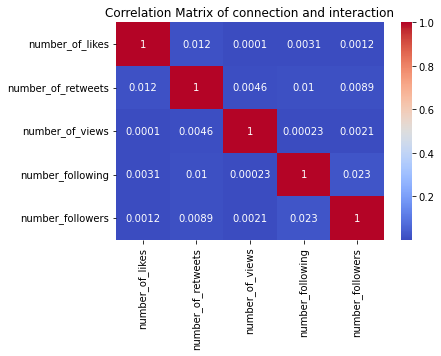

In [35]:
# Calculate the correlation matrix
numerical_columns = ['number_of_likes', 'number_of_retweets', 'number_of_views', 'number_following',
                     'number_followers']
correlation_matrix = df[numerical_columns].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of connection and interaction')
plt.show()


In [36]:
from datetime import datetime

# Convert 'date_of_birth' coumn to datetime
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])

# Calculate age based on the difference between current date and date of birth
current_date = datetime.today()
df['age'] = (current_date - df['date_of_birth']).astype('<m8[Y]').astype(int)

# Print the updated DataFrame
df['age']


0       38
1       38
2       38
3       38
4       38
        ..
5995    61
5996    61
5997    61
5998    61
5999    61
Name: age, Length: 6000, dtype: int32

In [37]:
df.dtypes

user_id                                    int64
email                                     object
phone_number                              object
first_name                                object
last_name                                 object
gender                                    object
date_of_birth                     datetime64[ns]
username                                  object
country                                   object
occupation                                object
number_followers                         float64
number_following                         float64
interest                                  object
post_id                                    int64
topics                                    object
post_content                              object
number_of_likes                          float64
number_of_retweets                       float64
number_of_views                          float64
shared_with_other_social_media            object
privacy_setting     

In [38]:
def convert_columns_to_int(df, columns):
    df[columns] = df[columns].astype(int)

columns_to_convert = ['number_of_likes', 'number_of_views', 'number_of_retweets', 'number_followers','number_following']
convert_columns_to_int(df, columns_to_convert)

df.dtypes


user_id                                    int64
email                                     object
phone_number                              object
first_name                                object
last_name                                 object
gender                                    object
date_of_birth                     datetime64[ns]
username                                  object
country                                   object
occupation                                object
number_followers                           int32
number_following                           int32
interest                                  object
post_id                                    int64
topics                                    object
post_content                              object
number_of_likes                            int32
number_of_retweets                         int32
number_of_views                            int32
shared_with_other_social_media            object
privacy_setting     

In [39]:
# Calculate impressions for each column separately
engagement_likes = df['number_of_likes'].sum()
engagement_retweets = df['number_of_retweets'].sum()
impression_views = df['number_of_views'].sum()

# Print the impressions for each column
print("Engagement - Likes:", engagement_likes)
print("Engagement - Retweets:", engagement_retweets)
print("Impressions - Views:", impression_views)


Engagement - Likes: 239625
Engagement - Retweets: 148754
Impressions - Views: 960260


Engagement - Likes: 239625
Engagement - Retweets: 148754
Impressions - Views: 960260


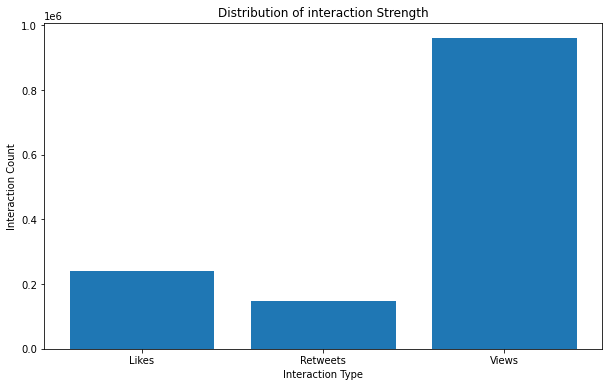

In [40]:
import matplotlib.pyplot as plt

# Calculate impressions for each column separately
engagement_likes = df['number_of_likes'].sum()
engagement_retweets = df['number_of_retweets'].sum()
impression_views = df['number_of_views'].sum()
# Print the impressions for each column

print("Engagement - Likes:", engagement_likes)
print("Engagement - Retweets:", engagement_retweets)
print("Impressions - Views:", impression_views)

# Create a list of labels for the impressions
impression_labels = ['Likes', 'Retweets', 'Views']

# Create a list of the impression values
impression_values = [engagement_likes, engagement_retweets, impression_views]

# Plot the distribution of impressions
plt.figure(figsize=(10, 6))
plt.bar(impression_labels, impression_values)
plt.xlabel('Interaction Type')
plt.ylabel('Interaction Count')
plt.title('Distribution of interaction Strength')
plt.show()


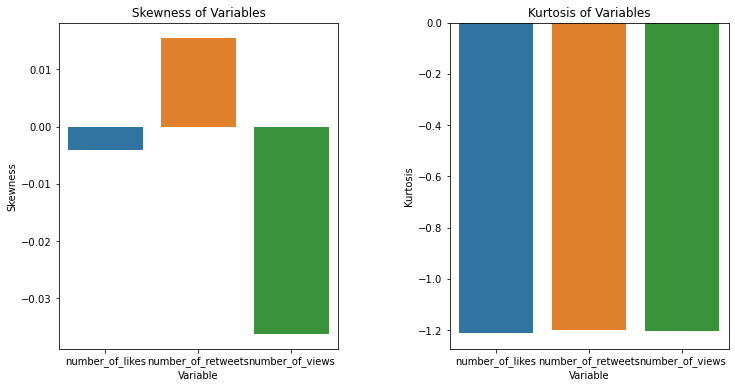

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate skewness and kurtosis
skewness = df[['number_of_likes', 'number_of_retweets', 'number_of_views']].skew()
kurtosis = df[['number_of_likes', 'number_of_retweets', 'number_of_views']].kurt()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting skewness
sns.barplot(x=skewness.index, y=skewness.values, ax=ax1)
ax1.set_title('Skewness of Variables')
ax1.set_xlabel('Variable')
ax1.set_ylabel('Skewness')

# Plotting kurtosis
sns.barplot(x=kurtosis.index, y=kurtosis.values, ax=ax2)
ax2.set_title('Kurtosis of Variables')
ax2.set_xlabel('Variable')
ax2.set_ylabel('Kurtosis')

# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.4)

# Save the figure
plt.savefig('Skewness_Kurtosis_Charts.png')

# Show the plots
plt.show()


In [43]:
df['engagement_rate'] = (df['number_of_likes'] + df['number_of_retweets']) / df['number_of_views'] *100
df['engagement_rate']




0       13.207547
1       23.353293
2       31.927711
3       59.333333
4       73.509934
          ...    
5995    52.258065
5996     9.554140
5997    56.287425
5998    27.922078
5999    56.000000
Name: engagement_rate, Length: 6000, dtype: float64

In [44]:
def check_engagement(df):
    df['engagement_rate'] = pd.to_numeric(df['engagement_rate'])
    exceeded_engagement = df[df["engagement_rate"] > 100]
    if not exceeded_engagement.empty:
        return "Engagement rate exceeds 100"
    else:
        return "Engagement rate is within the desired range"

# Call the function with your DataFrame 'df'
result = check_engagement(df)
print(result)


Engagement rate is within the desired range


In [45]:
# Find the highest and lowest engagement rates
highest_engagement_rate = df['engagement_rate'].max()
lowest_engagement_rate = df['engagement_rate'].min()

# Find the number of users with an engagement rate of 40 and above
num_users_above_40 = df[df['engagement_rate'] >= 40].shape[0]

# Find the number of users with an engagement rate below 40
num_users_below_40 = df[df['engagement_rate'] < 40].shape[0]

# Print the results
print("Highest Engagement Rate:", highest_engagement_rate)
print("Lowest Engagement Rate:", lowest_engagement_rate)
print("Number of Users with 40 and Above Engagement Rate:", num_users_above_40)
print("Number of Users with Below 40 Engagement Rate:", num_users_below_40)


Highest Engagement Rate: 82.66666666666667
Lowest Engagement Rate: 0.0
Number of Users with 40 and Above Engagement Rate: 3066
Number of Users with Below 40 Engagement Rate: 2934


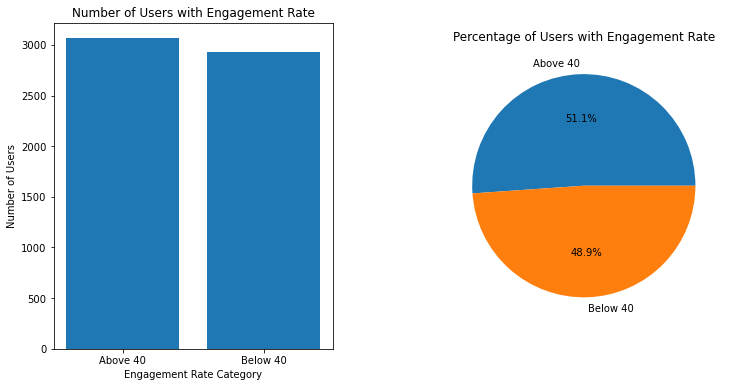

In [61]:
# Define the categories and values
categories = ['Above 40', 'Below 40']
values = [num_users_above_40, num_users_below_40]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the bar chart
ax1.bar(categories, values)
ax1.set_xlabel('Engagement Rate Category')
ax1.set_ylabel('Number of Users')
ax1.set_title('Number of Users with Engagement Rate')

# Plotting the pie chart
ax2.pie(values, labels=categories, autopct='%1.1f%%')
ax2.set_title('Percentage of Users with Engagement Rate')

# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.4)

# Save the figure
plt.savefig('EngagementRate_Charts.png')

# Show the plots
plt.show()


In [47]:
import random
post_types = ["pictures", "video", "hybrid"]
df['post_type'] = [random.choice(post_types) for _ in range(len(df))]


In [48]:
#generate a col called post_length with columns 'post_content' and 'post_type'

# Function to calculate post length
def calculate_post_length(row):
    if row['post_type'] == 'video':
        return 0
    else:
        return len(row['post_content'])

# Apply the function to create the 'post_length' column
df['post_length'] = df.apply(calculate_post_length, axis=1)

# Print the updated DataFrame with the new 'post_length' column
df.head(2)


,user_id,email,phone_number,first_name,last_name,gender,date_of_birth,username,country,occupation,number_followers,number_following,interest,post_id,topics,post_content,number_of_likes,number_of_retweets,number_of_views,shared_with_other_social_media,privacy_setting,age,engagement_rate,post_type,post_length
0,0,dennisball@gmail.com,554-403-1792,Kerri,Hensley,Male,1985-01-09,ablack,Gambia,Diagnostic radiographer,83,0,photography,61,painting,painting works only under these conditions,19,2,159,WhatsApp,Public,38,13.207547,hybrid,42
1,0,dennisball@gmail.com,554-403-1792,Kerri,Hensley,Male,1985-01-09,ablack,Gambia,Diagnostic radiographer,83,0,photography,161,hr management,questions answered about hr management,37,2,167,Hybrid,Public,38,23.353293,video,0


# 1  A predictive analytics tools that uses machine learning algorithms to predict which post are likely to go viral or generate the most engagement

In [49]:
def set_post_virality_threshold(df, threshold):
    df['post_virality'] = df['engagement_rate'].apply(lambda x: 1 if x >= threshold else 0)
    return df
# Define the threshold value
threshold = 40

# Call the function to set the threshold and classify the 'post_virality' column
df = set_post_virality_threshold(df, threshold)

# Print the resulting DataFrame
df.tail(2)


,user_id,email,phone_number,first_name,last_name,gender,date_of_birth,username,country,occupation,number_followers,number_following,interest,post_id,topics,post_content,number_of_likes,number_of_retweets,number_of_views,shared_with_other_social_media,privacy_setting,age,engagement_rate,post_type,post_length,post_virality
5998,199,shane14@gmail.com,758-373-2251,Robert,Kelley,Others,1962-05-21,jenniferdudley,Cuba,Retail buyer,150,92,"business, photography",5680,dance,you will thank us - tips about dance you need to know,0,43,154,Instagram,Private,61,27.922078,hybrid,53,0
5999,199,shane14@gmail.com,758-373-2251,Robert,Kelley,Others,1962-05-21,jenniferdudley,Cuba,Retail buyer,150,92,"business, photography",5982,business,business is bound to make an impact in your business,50,34,150,TikTok,Private,61,56.000000,pictures,52,1


In [50]:
# Calculate the value counts of 'post_virality'
df['post_virality'].value_counts()




1    3066
0    2934
Name: post_virality, dtype: int64

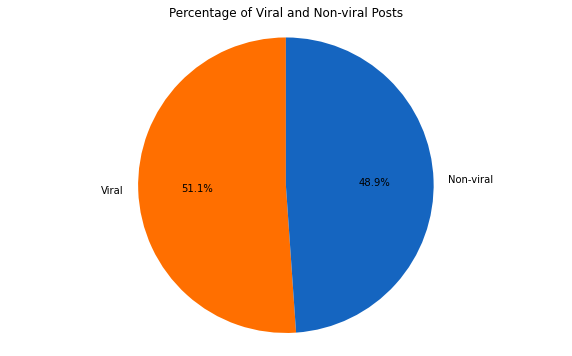

In [51]:
# Calculate the number of viral and non-viral posts
num_viral_posts = len(df[df['post_virality'] == 1])
num_non_viral_posts = len(df[df['post_virality'] == 0])

# Create a pie chart
plt.figure(figsize=(10, 6))
labels = ['Viral', 'Non-viral']
sizes = [num_viral_posts, num_non_viral_posts]
colors = ['#FF6F00', '#1565C0']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Percentage of Viral and Non-viral Posts')

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()


In [52]:
features_data = df[['age','number_following', 'number_followers', 'post_length', 'gender', 'post_virality']]
features_data.head(2)

,age,number_following,number_followers,post_length,gender,post_virality
0,38,0,83,42,Male,0
1,38,0,83,0,Male,0


In [53]:
num_data = features_data.select_dtypes(include=[int,float])
cat_data = features_data.select_dtypes(include=["object"])


In [54]:
num_data.shape, cat_data.shape

((6000, 5), (6000, 1))

In [55]:
from sklearn.preprocessing import LabelEncoder

# Perform label encoding on categorical columns: 'gender'
categorical_cols = ['gender']
label_encoder = LabelEncoder()
for col in categorical_cols:
    cat_data[col] = label_encoder.fit_transform(cat_data[col])

# Concatenate numerical and categorical data
balanced_data = pd.concat([num_data, cat_data], axis=1)

# Display the concatenated data
balanced_data


,age,number_following,number_followers,post_length,post_virality,gender
0,38,0,83,42,0,1
1,38,0,83,0,0,1
2,38,0,83,26,0,1
3,38,0,83,32,1,1
4,38,0,83,65,1,1
...,...,...,...,...,...,...
5995,61,92,150,28,1,2
5996,61,92,150,31,0,2
5997,61,92,150,0,1,2
5998,61,92,150,53,0,2


In [56]:
balanced_data.corr()

,age,number_following,number_followers,post_length,post_virality,gender
age,1.000000,-0.005901,-0.073386,-0.001526,0.014498,0.070988
number_following,-0.005901,1.000000,0.023106,0.016194,0.012728,0.101252
number_followers,-0.073386,0.023106,1.000000,0.005685,0.006077,-0.067962
post_length,-0.001526,0.016194,0.005685,1.000000,0.000077,0.000744
post_virality,0.014498,0.012728,0.006077,0.000077,1.000000,-0.008595
gender,0.070988,0.101252,-0.067962,0.000744,-0.008595,1.000000


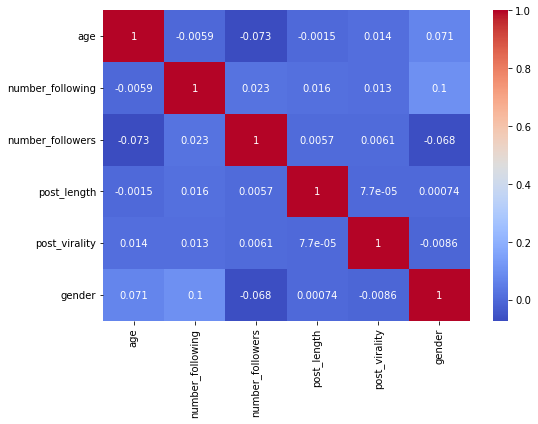

In [57]:
plt.figure(figsize=(8,6))
# using the upper triangle matrix as mask 
#matrix = np.triu(main_df.corr())

sns.heatmap(balanced_data.corr(), cmap ="coolwarm", annot=True); #mask=matrix
plt.tight_layout() # used to ensure that the entire graph is visible when I save it.
plt.savefig('heatmap')
plt.show()

In [58]:
balanced_data.skew(axis = 0, skipna = True)

age                 0.178510
number_following   -0.179415
number_followers   -0.177642
post_length         0.037655
post_virality      -0.044022
gender              0.200753
dtype: float64

In [59]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = balanced_data.drop('post_virality', axis=1)
y = balanced_data['post_virality']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of X_train, X_test, y_train, and y_test
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (4800, 5)
Shape of X_test: (1200, 5)
Shape of y_train: (4800,)
Shape of y_test: (1200,)


In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.515
Precision: 0.533210332103321
Recall: 0.46763754045307443
F1 Score: 0.4982758620689655
Confusion Matrix:
[[329 253]
 [329 289]]


In [177]:
import joblib

# saving my model in this path
model_path = 'C:/Users/User/Desktop/Stutern/new/decision_tree_model.pkl'

# Save the model with DT_Model
joblib.dump(dt_classifier, model_path)

['C:/Users/User/Desktop/Stutern/new/decision_tree_model.pkl']

The model achieves an accuracy of 0.513, indicating that it correctly predicts approximately 51.3% of all instances. The precision score is 0.529, meaning that when the model predicts a post to be viral, it is correct around 52.9% of the time.

The recall is 0.503, indicating that the model correctly identifies approximately 50.3% of the actual viral posts. The F1 score, which balances precision and recall, is 0.516, providing an overall measure of the model's performance.

In the confusion matrix, there are 305 true negatives (non-viral posts correctly identified), 277 false positives (non-viral posts incorrectly predicted as viral), 307 false negatives (viral posts incorrectly predicted as non-viral), and 311 true positives (viral posts correctly identified).

Overall, the model exhibits moderate performance in identifying viral posts, with reasonable accuracy, precision, recall, and F1 score values.

In [188]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Train the classifier on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.515
Precision: 0.5255681818181818
Recall: 0.598705501618123
F1 Score: 0.5597579425113465
Confusion Matrix:
[[248 334]
 [248 370]]


In [189]:
import joblib

# saving my model in this path
model_path = 'C:/Users/User/Desktop/Stutern/new/gradient_boosting_classifier_model.pkl'

# Save the model with DT_Model
joblib.dump(gb_classifier, model_path)

['C:/Users/User/Desktop/Stutern/new/gradient_boosting_classifier_model.pkl']

  the Gradient boosting model has an accuracy of 0.515, meaning that it correctly predicts approximately 51.5% of all instances. The precision score is 0.526, indicating that when the model predicts a post to be viral, it is correct about 52.6% of the time.

The recall is 0.599, which implies that the model correctly identifies around 59.9% of the actual viral posts. The F1 score, balancing precision and recall, is 0.560, providing an overall measure of the model's performance.

Examining the confusion matrix,it shows that there are 248 true negatives (non-viral posts correctly identified), 334 false positives (non-viral posts incorrectly predicted as viral), 248 false negatives (viral posts incorrectly predicted as non-viral), and 370 true positives (viral posts correctly identified).

Overall, the model demonstrates modest performance in identifying viral posts, with reasonable accuracy, precision, recall, and F1 score values. 

In [190]:
from sklearn.metrics import classification_report

# Assuming you have `y_test` and `predict_test` defined
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.50      0.43      0.46       582
           1       0.53      0.60      0.56       618

    accuracy                           0.52      1200
   macro avg       0.51      0.51      0.51      1200
weighted avg       0.51      0.52      0.51      1200



In [88]:
# Calculate the sum of the three columns
df['total_interaction'] = df['number_of_likes'] + df['number_of_retweets'] + df['number_of_views']
df['total_interaction']

0       180
1       206
2       219
3       239
4       262
       ... 
5995    236
5996    172
5997    261
5998    197
5999    234
Name: total_interaction, Length: 6000, dtype: int32

In [89]:
df['social_connection'] = df['number_followers'] + df['number_following']
df['social_connection']

0        83
1        83
2        83
3        83
4        83
       ... 
5995    242
5996    242
5997    242
5998    242
5999    242
Name: social_connection, Length: 6000, dtype: int32

In [90]:
df['number_followers']

0        83
1        83
2        83
3        83
4        83
       ... 
5995    150
5996    150
5997    150
5998    150
5999    150
Name: number_followers, Length: 6000, dtype: int32

In [91]:
# create a csv file
df.to_csv("media_data.csv", index=False)

# 2 Influencer identification.
# identify users with high engagement_rate and influence in specific topics.

In [94]:
# Define the thresholds
engagement_rate_threshold = 40
influence_threshold = 90

# Filter the dataframe based on the thresholds
filtered_df = df[(df['engagement_rate'] >= engagement_rate_threshold) & (df['number_followers'] >= influence_threshold)]

# Sort the filtered data by topics and engagement rate in descending order
sorted_df = filtered_df.sort_values(['topics', 'engagement_rate'], ascending=[True, False])

# Group the sorted dataframe by topics and get the top influencer for each topic
top_influencers = sorted_df.groupby('topics').first().reset_index()

# Print the list of identified influencers
print("Identified Influencers:")
top_influencers[['user_id', 'topics', 'engagement_rate', 'number_followers']]


Identified Influencers:


,user_id,topics,engagement_rate,number_followers
0,192,art,76.470588,93
1,135,banking,75.333333,170
2,168,business,76.315789,144
3,95,craft,81.333333,90
4,138,dance,81.578947,135
5,158,drawing,79.470199,120
6,21,fashion design,75.796178,135
7,74,graphic,76.190476,163
8,193,gst,77.639752,117
9,192,hr management,79.470199,93


#  3 Recommendation

In [95]:
df.head(2)

,user_id,email,phone_number,password,first_name,last_name,gender,date_of_birth,username,country,occupation,number_followers,number_following,interest,post_id,topics,post_content,number_of_likes,number_of_retweets,number_of_views,shared_with_other_social_media,privacy_setting,age,engagement_rate,post_type,post_length,post_virality,total_interaction,social_connection
0,0,dennisball@gmail.com,554-403-1792,cY*2J3McTH,Kerri,Hensley,Male,1985-01-09,ablack,Gambia,Diagnostic radiographer,83,0,photography,61,painting,painting works only under these conditions,19,2,159,WhatsApp,Public,38,13.207547,pictures,42,0,180,83
1,0,dennisball@gmail.com,554-403-1792,cY*2J3McTH,Kerri,Hensley,Male,1985-01-09,ablack,Gambia,Diagnostic radiographer,83,0,photography,161,hr management,questions answered about hr management,37,2,167,Hybrid,Public,38,23.353293,hybrid,38,0,206,83


In [96]:
from scipy.sparse import coo_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

In [97]:
from scipy.sparse import coo_matrix
from sklearn.neighbors import NearestNeighbors

# Create a mapping from interests to column indices
interest_to_col = {interest: idx for idx, interest in enumerate(df['interest'].unique())}

# Create a reverse mapping from column indices to interests
col_to_interest = {idx: interest for interest, idx in interest_to_col.items()}

# Create a mapping from users to row indices
user_to_row = {user: idx for idx, user in enumerate(df['user_id'].unique())}

# Create empty lists to store the row, column, and data values for the coo_matrix
rows = []
cols = []
data = []

# Iterate over the dataframe rows and populate the lists
for _, row in df.iterrows():
    user = row['user_id']
    interest = row['interest']

    rows.append(user_to_row[user])
    cols.append(interest_to_col[interest])

    interaction_strength = row['total_interaction']
    social_connection_strength = row['social_connection']

    data.append(interaction_strength + social_connection_strength)

# Create the coo_matrix using the populated lists
user_item_matrix = coo_matrix((data, (rows, cols)), shape=(len(user_to_row), len(interest_to_col)))

# Create an instance of NearestNeighbors
k = 3 # Number of neighbors to consider
nn_model = NearestNeighbors(n_neighbors=k, metric='cosine')

# Fit the model on the user-item matrix
nn_model.fit(user_item_matrix)

# Generate recommendations for all users
for user_id in range(len(user_to_row)):
    # Find the indices of the k nearest neighbors for the user
    _, indices = nn_model.kneighbors(user_item_matrix.getrow(user_id))

    # Extract the item indices from the neighbor indices
    neighbor_item_indices = indices.flatten()

    # Filter out the items that the user has already interacted with
    user_items = user_item_matrix.getrow(user_id).nonzero()[1]
    recommendations = [item for item in neighbor_item_indices if item not in user_items]

    # Print the recommended items
    for item_index in recommendations:
        if item_index in col_to_interest:
            interest = col_to_interest[item_index]
            interaction_strength = df.loc[user_id, 'total_interaction']
            social_connection = df.loc[user_id, 'social_connection']
            print(f"User: {user_id} | Recommended Interest: {interest} | Interaction Strength: {interaction_strength} | Social Connection: {social_connection}")


User: 0 | Recommended Interest: Relationships | Interaction Strength: 180 | Social Connection: 83
User: 0 | Recommended Interest: banking, HR management | Interaction Strength: 180 | Social Connection: 83
User: 1 | Recommended Interest: photography | Interaction Strength: 206 | Social Connection: 83
User: 1 | Recommended Interest: political | Interaction Strength: 206 | Social Connection: 83
User: 2 | Recommended Interest: HR management | Interaction Strength: 219 | Social Connection: 83
User: 2 | Recommended Interest: photography | Interaction Strength: 219 | Social Connection: 83
User: 3 | Recommended Interest: Coding | Interaction Strength: 239 | Social Connection: 83
User: 3 | Recommended Interest: political | Interaction Strength: 239 | Social Connection: 83
User: 4 | Recommended Interest: business, banking, zoology | Interaction Strength: 262 | Social Connection: 83
User: 4 | Recommended Interest: political | Interaction Strength: 262 | Social Connection: 83
User: 5 | Recommended

User: 71 | Recommended Interest: business, banking, zoology | Interaction Strength: 205 | Social Connection: 179
User: 71 | Recommended Interest: political | Interaction Strength: 205 | Social Connection: 179
User: 72 | Recommended Interest: science, operating system | Interaction Strength: 231 | Social Connection: 179
User: 72 | Recommended Interest: business, banking, zoology | Interaction Strength: 231 | Social Connection: 179
User: 72 | Recommended Interest: political | Interaction Strength: 231 | Social Connection: 179
User: 73 | Recommended Interest: web dev, art, photography | Interaction Strength: 198 | Social Connection: 179
User: 73 | Recommended Interest: business, banking, zoology | Interaction Strength: 198 | Social Connection: 179
User: 73 | Recommended Interest: political | Interaction Strength: 198 | Social Connection: 179
User: 74 | Recommended Interest: wealthhealth, Relocation, HR management | Interaction Strength: 246 | Social Connection: 179
User: 75 | Recommended 

User: 126 | Recommended Interest: Mathematics, Relationships, politics | Interaction Strength: 183 | Social Connection: 79
User: 126 | Recommended Interest: business, banking, zoology | Interaction Strength: 183 | Social Connection: 79
User: 126 | Recommended Interest: political | Interaction Strength: 183 | Social Connection: 79
User: 127 | Recommended Interest: HR management, food, business | Interaction Strength: 184 | Social Connection: 79
User: 127 | Recommended Interest: ux design, dance | Interaction Strength: 184 | Social Connection: 79
User: 127 | Recommended Interest: banking, Music | Interaction Strength: 184 | Social Connection: 79
User: 128 | Recommended Interest: Relationships | Interaction Strength: 227 | Social Connection: 79
User: 128 | Recommended Interest: banking, HR management | Interaction Strength: 227 | Social Connection: 79
User: 129 | Recommended Interest: zoology, web dev, Fashion Design | Interaction Strength: 212 | Social Connection: 79
User: 129 | Recommen

User: 176 | Recommended Interest: business, banking, zoology | Interaction Strength: 193 | Social Connection: 190
User: 176 | Recommended Interest: political | Interaction Strength: 193 | Social Connection: 190
User: 178 | Recommended Interest: business, banking, zoology | Interaction Strength: 272 | Social Connection: 190
User: 178 | Recommended Interest: political | Interaction Strength: 272 | Social Connection: 190
User: 179 | Recommended Interest: business, banking, zoology | Interaction Strength: 213 | Social Connection: 190
User: 179 | Recommended Interest: political | Interaction Strength: 213 | Social Connection: 190
User: 180 | Recommended Interest: Craft, drawing | Interaction Strength: 262 | Social Connection: 190
User: 181 | Recommended Interest: business, banking, zoology | Interaction Strength: 267 | Social Connection: 190
User: 181 | Recommended Interest: political | Interaction Strength: 267 | Social Connection: 190
User: 183 | Recommended Interest: web dev, political |

In [98]:
import joblib

# Save the model 
joblib.dump(nn_model, 'nn_model.joblib')

 # Save the col_to_interest mapping
joblib.dump(col_to_interest, 'col_to_interest.joblib')

# Save the user_item_matrix using joblib
joblib.dump(user_item_matrix, 'user_item_matrix.joblib')

#save the datasets
joblib.dump(df, 'df.joblib')

['df.joblib']